In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#main analysis dataset
df = pd.read_stata("hall_thompson_replication_files/rd_analysis_hs.dta")
df.columns.values

array(['state', 'dist', 'dem', 'year', 'turnout_dem_strong',
       'low_info_votes1', 'high_info_votes1', 'low_info_n1',
       'high_info_n1', 'turnout_dem_nvstrong', 'low_info_votes2',
       'high_info_votes2', 'low_info_n2', 'high_info_n2',
       'turnout_dem_lean', 'low_info_votes3', 'high_info_votes3',
       'low_info_n3', 'high_info_n3', 'turnout_indep', 'low_info_votes4',
       'high_info_votes4', 'low_info_n4', 'high_info_n4',
       'turnout_rep_lean', 'low_info_votes5', 'high_info_votes5',
       'low_info_n5', 'high_info_n5', 'turnout_rep_rep_nvstrong',
       'low_info_votes6', 'high_info_votes6', 'low_info_n6',
       'high_info_n6', 'turnout_rep_strong', 'low_info_votes7',
       'high_info_votes7', 'low_info_n7', 'high_info_n7',
       'total_responses', 'total_turnout', 'turnout_dem', 'turnout_rep',
       'dem_turnout_share', 'rep_turnout_share', 'low_info_turnout',
       'high_info_turnout', 'dem_low_info_turnout_share',
       'rep_low_info_turnout_share', 'dem

In [3]:
cutoff = df["absdist"].median()
cutoff

0.12193753

In [4]:
df2 = df[np.abs(df.rv)<.1]
df3 = df[df.absdist>cutoff][["vote_general", "victory_general", "turnout_party_share", "treat", "rv", "rv2", "rv3", "rv4", "rv5", "g", "dist"]]
df4 = df[(np.abs(df.rv)<.1) & (df.absdist>cutoff)]
len(df4)

109

In [5]:
df_cp = df.copy(deep=True).dropna()
df3_cp = df3.copy(deep=True).dropna()
df4_cp = df4.copy(deep=True).dropna()

In [6]:
#table1: estimates on vote share and victory RD
vote_share = pd.DataFrame()
vote_share["c1"] = smf.ols(formula='vote_general ~ treat + rv + treat_rv', data=df4).fit(cov_type = 'cluster', cov_kwds={'groups': df4['g']}).params 
vote_share["c2"] = smf.ols(formula='vote_general ~ treat + rv + rv2 + rv3', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).params
vote_share["c3"] = smf.ols(formula='vote_general ~ treat + rv + rv2 + rv3 + rv4 + rv5', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).params 
vote_share["c4"] = smf.ols(formula='vote_general ~ rv', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).params
vote_share

,c1,c2,c3,c4
Intercept,0.571126,0.576673,0.591576,0.578891
treat,-0.125614,-0.073253,-0.103788,NaN
rv,0.016220,0.082527,0.392000,-0.122190
treat_rv,1.437518,NaN,NaN,NaN


In [7]:
victory = pd.DataFrame()
victory["c5"] = smf.ols(formula='victory_general ~ treat + rv + treat_rv', data=df4).fit(cov_type = 'cluster', cov_kwds={'groups': df4['g']}).params 
victory["c6"] = smf.ols(formula='victory_general ~ treat + rv + rv2 + rv3', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).params
victory["c7"] = smf.ols(formula='victory_general ~ treat + rv + rv2 + rv3 + rv4 + rv5', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).params 
victory["c8"] = smf.ols(formula='victory_general ~ rv', data=df3).fit(cov_type = 'cluster', cov_kwds={'groups': df3['g']}).params
victory

,c5,c6,c7,c8
Intercept,0.615526,0.767987,0.793402,0.660412
treat,-0.388739,-0.362493,-0.447032,NaN
rv,-2.379339,1.026059,1.882502,-0.171869
treat_rv,7.339911,NaN,NaN,NaN


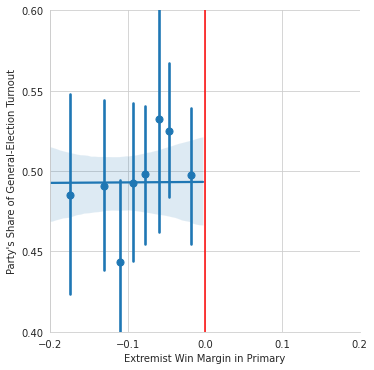

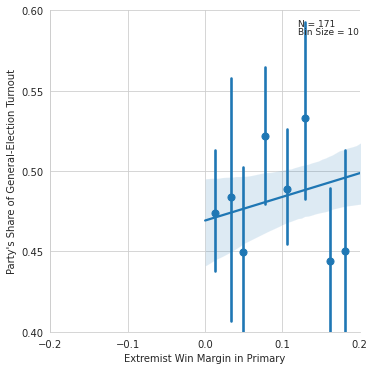

In [8]:
#figure2: binned averages of extremist candidate's win margin in each primary (x) against general election vote share of primary winner (y)
def rd(data, mid): 
    sns.set_style("whitegrid")
    g=sns.lmplot(x="rv", y="turnout_party_share", data=data[data.rv<mid], x_bins=10)
    plt.axvline(color='r')
    ax=sns.lmplot(x="rv", y="turnout_party_share", data=data[data.rv>mid], x_bins=10)
    
    g.set(xlabel="Extremist Win Margin in Primary", ylabel="Party's Share of General-Election Turnout")
    g.set(xlim=(-0.2, 0.2), ylim=(0.40, 0.60), xticks=[-0.2, -0.1, 0.0, 0.1, 0.2], yticks=[0.40, 0.45, 0.50, 0.55, 0.60]) #.fig.subplots_adjust(wspace=0.0)

    ax.set(xlabel="Extremist Win Margin in Primary", ylabel="Party's Share of General-Election Turnout")
    ax.set(xlim=(-0.2, 0.2), ylim=(0.40, 0.60), xticks=[-0.2, -0.1, 0.0, 0.1, 0.2], yticks=[0.40, 0.45, 0.50, 0.55, 0.60]) #.fig.subplots_adjust(wspace=0.0)

    plt.text(0.12, 0.590, "N = 171", fontsize=9)
    plt.text(0.12, 0.585, "Bin Size = 10", fontsize=9)
    plt.show()
    
rd(data=df, mid=0)

In [9]:
#table2: formal estimates using same specifications as vote share RD
partisan_share_of_turnout = pd.DataFrame() 
partisan_share_of_turnout["c1"] = smf.ols(formula="turnout_party_share ~ treat + rv + treat_rv", data=df4_cp).fit(cov_type = 'cluster', cov_kwds={'groups': df4_cp['g']}).params
partisan_share_of_turnout["c2"] = smf.ols(formula='turnout_party_share ~ treat + rv + rv2 + rv3', data=df3_cp).fit(cov_type = 'cluster', cov_kwds={'groups': df3_cp['g']}).params
partisan_share_of_turnout["c3"] = smf.ols(formula='turnout_party_share ~ treat + rv + rv2 + rv3 + rv4 + rv5', data=df3_cp).fit(cov_type = 'cluster', cov_kwds={'groups': df3_cp['g']}).params 
partisan_share_of_turnout["c4"] = smf.ols(formula='turnout_party_share ~ rv', data=df3_cp).fit(cov_type = 'cluster', cov_kwds={'groups': df3_cp['g']}).params
partisan_share_of_turnout 

,c1,c2,c3,c4
Intercept,0.378427,0.515249,0.538082,0.497271
treat,0.038771,-0.063591,-0.085000,NaN
rv,-2.420444,0.198609,0.409155,0.050970
treat_rv,4.332590,NaN,NaN,NaN
